# Leath Cluster
Implementation of Leath cluster
http://wiki.cs.umt.edu/classes/cs477/index.php/Leath_In-Class_Programming


In [4]:
import numpy as np
from time import sleep
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline


In [5]:
class Leath:
    def __init__(self, world_size=40, probability=0.5):
        self.world_size = world_size
        self.probability = probability
        self.lattice = np.zeros((world_size, world_size), dtype=np.int8).tolist()
        self.lattice[world_size//2][world_size//2] = 2
        self.perimeter = {(world_size//2 + 1, world_size//2),
                          (world_size//2 - 1, world_size//2),
                          (world_size//2, world_size//2 + 1),
                          (world_size//2, world_size//2 - 1),
                          }
        self.new_points = set()
        self.cycles = 0

    def iterate(self):
        """
        Iterate through lattice.
        cluster = 2, dead = 1, unexplored = 0
        First, evaluate current perimeter set.
        Next, update new perimeter set.

        :return: None
        """
        self.evaluate_perimeter()
        self.update_perimeter()
        self.cycles += 1

        return None

    def evaluate_perimeter(self):
        """
        Iterate through perimeter and update cluster if sampled probability is above probability threshold
        self.probability.

        :return: None
        """

        for point in self.perimeter:

            if np.random.sample() >= self.probability:
                self.lattice[point[0]][point[1]] = 2
                self.new_points.add(point)
            else:
                self.lattice[point[0]][point[1]] = 1

        return None

    def update_perimeter(self):
        """
        Update perimeter.

        :return: None
        """
        self.perimeter.clear()

        for point in self.new_points:
            self.check_point((point[0] + 1, point[1]))
            self.check_point((point[0] - 1, point[1]))
            self.check_point((point[0], point[1] + 1))
            self.check_point((point[0], point[1] - 1))

        self.new_points.clear()

        return None

    def check_point(self, point: tuple):
        """
        Negative point coordinates cause periodic boundary conditions on left and bottom side
        due to python indexing.
        If point in world and unexplored, add to perimeter.

        :return: None
        """

        for item in point:
            if item < 0:
                return None

        try:
            if self.lattice[point[0]][point[1]] == 0:
                self.perimeter.add(point)
        except IndexError:
            pass

        return None

    def reset(self):
        """
        Essentially resets the init.
        :return:
        """
        pass

    def get_mass(self):
        mass, _ = np.where(np.array(self.lattice))

    def animate(self):
        """
        Iterate through the space until cluster is completely surrounded by dead cells.

        :return: None
        """
        plt.figure()
        while len(self.perimeter) > 0:
            self.plot()
            self.iterate()
            sleep(0.01)
            clear_output(wait=True)
        self.plot()

        return None

    def plot(self):
        """
        Plot current lattice configuration.

        :return: None
        """
        plt.figure()
        plt.title("World Size: {}x{}\nIteration: {}".format(self.world_size,
                                                            self.world_size,
                                                            self.cycles))

        plt.imshow(self.lattice)
        plt.show()

        return None


## Non-Periodic Boundary Conditions

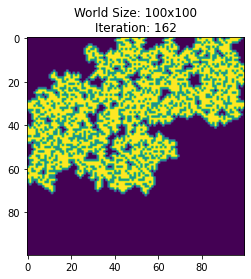

In [6]:
non_periodic = Leath(world_size=100, probability=0.4)
non_periodic.animate()